## 3D Terzaghi Exact Solution

*Using second order central-difference method*

Note that this code takes several hours to compute a smooth 80x80x80 grid for the pore pressure contour plot. CPU cores > 64 are recommended. Using AMD EPYC 7742, solution takes 2.34 hours to complete.

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define parameters
cx = 0.05
cy = 0.1
cz = 0.15

Nx = Ny = Nz = 80
Nt = 21600
Delta_x, Delta_y, Delta_z = 1/Nx, 1/Ny, 1/Nz
Delta_t = 1/Nt  # Time step 4.63e-5 used in paper

x_range = np.linspace(0, 1, Nx)
y_range = np.linspace(0, 1, Ny) # Doubling for half plot
z_range = np.linspace(0, 1, Nz)
t_range = np.linspace(0, 1, Nt)

# Initial condition
u_0 = 1.0  # Initial excess pore water pressure

# Initialize pore water pressure array
u = np.zeros((len(x_range), len(y_range), len(z_range), len(t_range)))

# Apply initial condition
u[:, :, :, 0] = u_0

# Start time for progress tracking
start_time = time.time()

# Time-stepping loop
for n in range(0, len(t_range) - 1):
    for i in range(1, len(x_range) - 1):
        for j in range(1, len(y_range) - 1):
            for k in range(1, len(z_range) - 1):
                u[i, j, k, n + 1] = u[i, j, k, n] + Delta_t * (
                    cx * (u[i + 1, j, k, n] - 2 * u[i, j, k, n] + u[i - 1, j, k, n]) / Delta_x**2 +
                    cy * (u[i, j + 1, k, n] - 2 * u[i, j, k, n] + u[i, j - 1, k, n]) / Delta_y**2 +
                    cz * (u[i, j, k + 1, n] - 2 * u[i, j, k, n] + u[i, j, k - 1, n]) / Delta_z**2
                )

    # Apply boundary conditions for the 3D Terzaghi problem (Case 2)
    u[0, :, :, n + 1] = 0  # u(0,y,z,t) = 0
    u[-1, :, :, n + 1] = 0  # u(l,y,z,t) = 0
    u[:, 0, :, n + 1] = 0  # u(x,0,z,t) = 0
    u[:, -1, :, n + 1] = 0  # u(x,b,z,t) = 0
    
    # Neumann boundary conditions for z direction (zero flux)
    u[:, :, 0, n + 1] = u[:, :, 1, n + 1]  # ∂u/∂z at z=0
    u[:, :, -1, n + 1] = u[:, :, -2, n + 1]  # ∂u/∂z at z=h
    
    # Print progress every 2000 time steps and write to file
    if (n + 1) % 2000 == 0:
        elapsed_time = time.time() - start_time
        remaining_time = elapsed_time * (len(t_range) - n - 1) / (n + 1)
        progress_message = f"Time step {n + 1}/{len(t_range) - 1} completed. Estimated time remaining: {remaining_time:.2f} seconds"
        print(progress_message)

print("Simulation completed.")

Time step 2000/21599 completed. Estimated time remaining: 58.69 seconds
Time step 4000/21599 completed. Estimated time remaining: 52.47 seconds
Time step 6000/21599 completed. Estimated time remaining: 47.10 seconds
Time step 8000/21599 completed. Estimated time remaining: 40.98 seconds


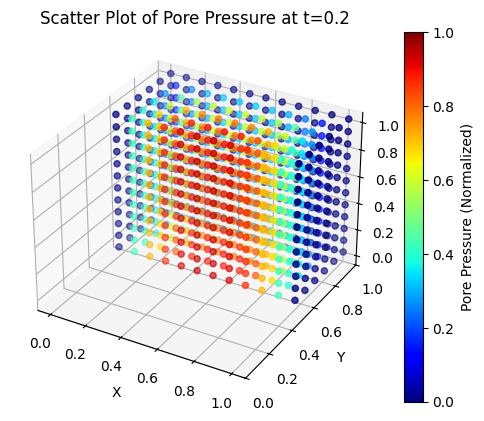

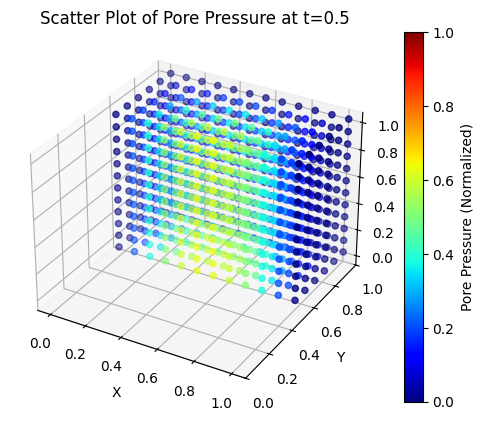

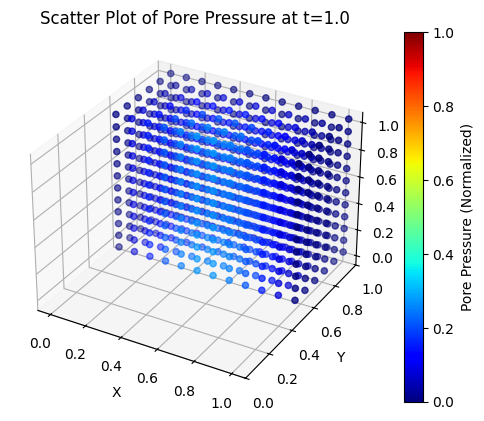

In [12]:
# Function to plot scatter plot
def plot_scatter_at_time(t_index, time_value):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Prepare the mesh grid for scatter plotting
    X, Y, Z = np.meshgrid(x_range, y_range, z_range, indexing='ij')
    
    # Extract the pore pressure at the specified time
    u_t = u[:, :, :, t_index]
    
    # Flatten the arrays for scatter plotting
    X_flat = X.flatten()
    Y_flat = Y.flatten()
    Z_flat = Z.flatten()
    u_flat = u_t.flatten()
    
    # Filter to include only the specified y range
    mask = (Y_flat >= 0.5) & (Y_flat <= 1.0)
    
    # Creating a 3D scatter plot
    scatter = ax.scatter(X_flat[mask], Y_flat[mask], Z_flat[mask], c=u_flat[mask], cmap='jet', vmin=0, vmax=1, marker='o')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Scatter Plot of Pore Pressure at t={time_value}')
    ax.set_ylim([0, 1])
    
    # Adding a color bar to indicate pressure levels
    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_label('Pore Pressure (Normalized)')
    plt.savefig(f'ExactSolution (t={time_value}).png', dpi=600)
    plt.show()

# Find the indices for the specific times
times = [0.2, 0.5, 1.0]
time_indices = [int(t * (Nt-1)) for t in times]

# Plot scatter plots for specified times
for t_index, time_value in zip(time_indices, times):
    plot_scatter_at_time(t_index, time_value)